In [93]:
import pandas as pd
import os
import matplotlib.pyplot as plt
def df_vox_generator(phat_fanto_vox):
    #  
    directory=phat_fanto_vox
    csv_files = [f for f in os.listdir(directory) if f.startswith("o") and f.endswith(".csv")]

    # DataFrame vacío para acumular los datos
    combined_data = pd.DataFrame()
    
    #* Leer y acumular datos de cada archivo CSV
    for file in csv_files:
        file_path = os.path.join(directory, file)
        data = pd.read_csv(file_path, delimiter=",", comment="#", header=None)
        
        data.columns = ["Detector_Number", "x","y","z", "Total_Energy_Deposited", "Energy_Per_Particle", "Energy_Squared_Sum", "Quadric_Energy_Per_Particle", "sigma","n_total"]

        if combined_data.empty:
            combined_data = data
        else:
            #?selecciona las claves que no se sumaran y suma lo demas
            combined_data = combined_data.set_index(["Detector_Number","x","y","z"]).add(data.set_index(["Detector_Number","x","y","z"]), fill_value=0).reset_index()
    # Añadir la lista n_total al DataFrame combinado
    


    #*postproduccion! calculamos los valores que no son solo suma de los valores de los threads 
    energy=combined_data.Energy_Per_Particle
    n_total=combined_data.n_total #/30
    # print(n_total)
    combined_data["m_sigma"]=3*((combined_data.Energy_Squared_Sum/n_total-(combined_data.Total_Energy_Deposited/n_total)**2)/n_total)**0.5
    
    combined_data['Ix'] = pd.factorize(combined_data['x'])[0]
    combined_data['Iy'] = pd.factorize(combined_data['y'])[0]
    combined_data['Iz'] = pd.factorize(combined_data['z'])[0]

    combined_data["n_total"]=n_total
    combined_data["Energy_Per_Particle"]=combined_data.Total_Energy_Deposited/n_total

    # merged_data=combined_data[["Detector_Number","x","y","z","Total_Energy_Deposited", "Energy_Per_Particle","m_sigma", "n_total"]]
    combined_data.to_csv("merged_output.csv",index=False)
    combined_data

    new_column_order = [
        'Ix','Iy','Iz', 'x', 'y','z',  'Detector_Number', 'Total_Energy_Deposited',
        'Energy_Per_Particle', 'Energy_Squared_Sum', 'Quadric_Energy_Per_Particle',
        'sigma', 'n_total', 'm_sigma'
    ]

    # Reordenar las columnas del DataFrame según la lista
    combined_data= combined_data[new_column_order]



    # Crear la carpeta si no existe
    output_folder = directory+"\merged_results"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    export_data=combined_data[['Ix','Iy','Iz', 'x', 'y','z', 'Total_Energy_Deposited',
        'Energy_Per_Particle', 'm_sigma','n_total']]
    # Guardar el DataFrame en un archivo CSV dentro de la carpeta
    output_file = os.path.join(output_folder, "data_bins_energy_deposited.csv")
    export_data.to_csv(output_file, index=False)

    print(f"Archivo guardado en: {output_file}")

    
    data_vox=combined_data
    return data_vox

In [94]:
#Prototipo 4
path=r"D:\Articulo2_MEDPHYS\Agility_MLC\ffprobes\10pos\pruebasautocampo\p4_elekta_5x5mrot100\build\Release"
df_1=df_vox_generator(path) 
  

Archivo guardado en: D:\Articulo2_MEDPHYS\Agility_MLC\ffprobes\10pos\pruebasautocampo\p4_elekta_5x5mrot100\build\Release\merged_results\data_bins_energy_deposited.csv


c:\Users\remot\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\remot\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


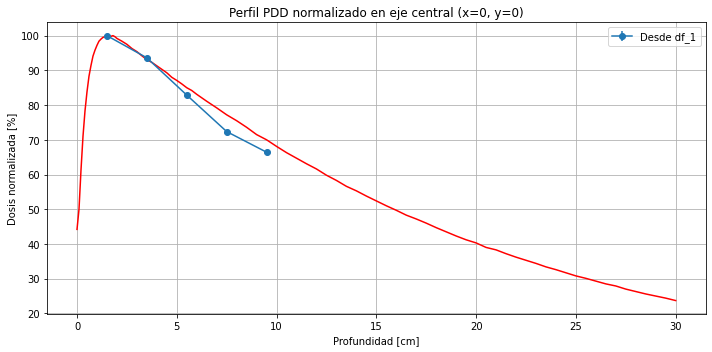

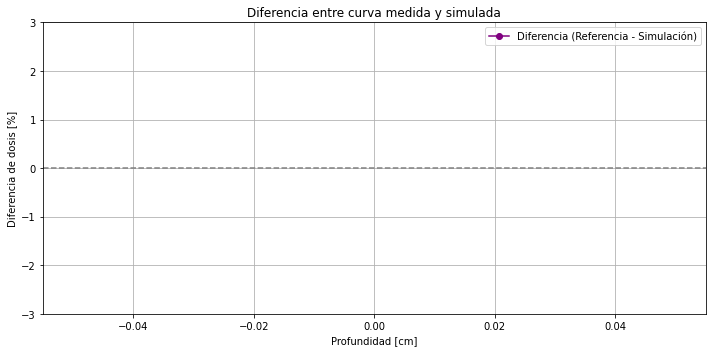

In [95]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import numpy as np
# Datos como texto
data = """
i	mm	%
1	0	44.2
2	1	50
3	2	61.3
4	3	71
5	4	78.3
6	5	83.8
7	6	88.3
8	7	91.4
9	8	94.1
10	9	95.8
11	10	97.2
12	11	98.4
13	12	99
14	13	99.5
15	14	99.7
16	15	100
17	16	100
18	17	99.8
19	18	100
20	19	99.7
21	20	99.2
22	22.5	98.4
23	25	97.5
24	27.5	96.3
25	30	95.4
26	32.5	94.2
27	35	93.1
28	37.5	92.3
29	40	91.3
30	42.5	90.3
31	45	89.3
32	47.5	88
33	50	87.1
34	52.5	86.1
35	55	85
36	57.5	84.2
37	60	83.1
38	65	81.1
39	70	79.2
40	75	77.2
41	80	75.5
42	85	73.6
43	90	71.5
44	95	70
45	100	68.1
46	105	66.3
47	110	64.7
48	115	63.1
49	120	61.6
50	125	59.8
51	130	58.3
52	135	56.6
53	140	55.3
54	145	53.8
55	150	52.4
56	155	51
57	160	49.7
58	165	48.3
59	170	47.2
60	175	46
61	180	44.7
62	185	43.5
63	190	42.3
64	195	41.2
65	200	40.3
66	205	39
67	210	38.3
68	215	37.2
69	220	36.2
70	225	35.3
71	230	34.4
72	235	33.4
73	240	32.6
74	245	31.7
75	250	30.8
76	255	30.1
77	260	29.3
78	265	28.5
79	270	27.9
80	275	27
81	280	26.3
82	285	25.6
83	290	25
84	295	24.4
85	300	23.7
"""

# Leer datos como DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(df["mm"]/10, df["%"],   linestyle="-", color="red")
plt.grid(True)
plt.xlabel("Distancia (mm)")
plt.ylabel("Dosis relativa (%)")
plt.title("Perfil lateral - Elekta 10x10 cm² en agua, 6 MV (Cámara IC)")
plt.tight_layout()
# plt.show()

# Extraer perfil desde df_1
df = df_1
pdd = df[(df["x"] == 0) & (df["y"] == 0)].sort_values(by="z")
pdd_norm = pdd["Energy_Per_Particle"] / pdd[pdd["z"]==-1.5]["Energy_Per_Particle"].max() * 100
pdd_err = pdd["m_sigma"] / pdd[pdd["z"]==101.5]["Energy_Per_Particle"].max() * 100

# # Datos de referencia (pueden venir de simulación, experimento o tabla previa)
# z = [ 29.50, 29.00, 28.50, 28.00, 27.50, 27.00, 26.50, 26.00, 25.50, 25.00, 24.50, 24.00, 23.50, 23.00, 22.50, 22.00, 21.50, 21.00, 20.50, 20.00, 19.50, 19.00, 18.50, 18.00, 17.50, 17.00, 16.50, 16.00, 15.50, 15.00, 14.50, 14.00, 13.50, 13.00, 12.50, 12.00, 11.50, 11.00, 10.50, 10.00, 9.50, 9.00, 8.50, 8.00, 7.50, 7.00, 6.50, 6.00, 5.50, 5.00, 4.50, 4.00, 3.50, 3.00, 2.50, 2.00, 1.50, 1.00, 0.50 ]
# pdd_normalized = [ 25.14, 27.46, 27.23, 28.85, 30.31, 30.99, 31.65, 32.46, 32.48, 34.02, 34.06, 34.29, 36.87, 38.11, 39.82, 40.18, 39.59, 41.34, 41.73, 43.74, 44.40, 46.49, 47.62, 48.43, 49.90, 50.91, 51.51, 53.45, 55.30, 57.40, 57.11, 58.75, 60.54, 62.13, 62.23, 65.07, 66.10, 68.07, 70.21, 72.25, 73.10, 74.97, 75.75, 77.38, 79.40, 81.98, 82.13, 84.43, 86.36, 88.97, 92.37, 92.33, 96.29, 97.69, 99.86, 99.34, 100.00, 97.46, 79.78 ]
# # Graficar ambos perfiles
# # plt.figure(figsize=(8, 5))

# Perfil desde DataFrame
plt.errorbar(-1*pdd["z"], pdd_norm, yerr=pdd_err, fmt="-o", label="Desde df_1")

# Perfil de referencia
# plt.plot(z, pdd_normalized, "-", label="Datos referencia", color="red")

# Configuración del gráfico
plt.title("Perfil PDD normalizado en eje central (x=0, y=0)")
plt.xlabel("Profundidad [cm]")
plt.ylabel("Dosis normalizada [%]")
plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.xlim(0,30)
# plt.show()

# Leer datos de referencia
df_ref = pd.read_csv(StringIO(data), sep="\t")
df_ref["cm"] = df_ref["mm"] / 10  # Convertimos a cm para coincidir con pdd["z"]

# Obtener perfil desde df_1
df = df_1.copy()
pdd = df[(df["x"] == 0) & (df["y"] == 0)].sort_values(by="z")
norm_factor = pdd[pdd["z"]==101.5]["Energy_Per_Particle"].max()
pdd["norm_dose"] = pdd["Energy_Per_Particle"] / norm_factor * 100

# Interpolación de la curva de df_1 en los puntos de df_ref
interp_dose = np.interp(df_ref["cm"], pdd["z"] - 100, pdd["norm_dose"])

# Calcular diferencia
df_ref["dif"] = df_ref["%"] - interp_dose

# Graficar diferencia
plt.figure(figsize=(10, 5))
plt.plot(df_ref["cm"], df_ref["dif"],"-o", label="Diferencia (Referencia - Simulación)", color="purple")
plt.axhline(0, linestyle="--", color="gray")
plt.grid(True)
plt.xlabel("Profundidad [cm]")
plt.ylabel("Diferencia de dosis [%]")
plt.title("Diferencia entre curva medida y simulada")
plt.legend()
plt.ylim(-3,3)
plt.tight_layout()
plt.show()


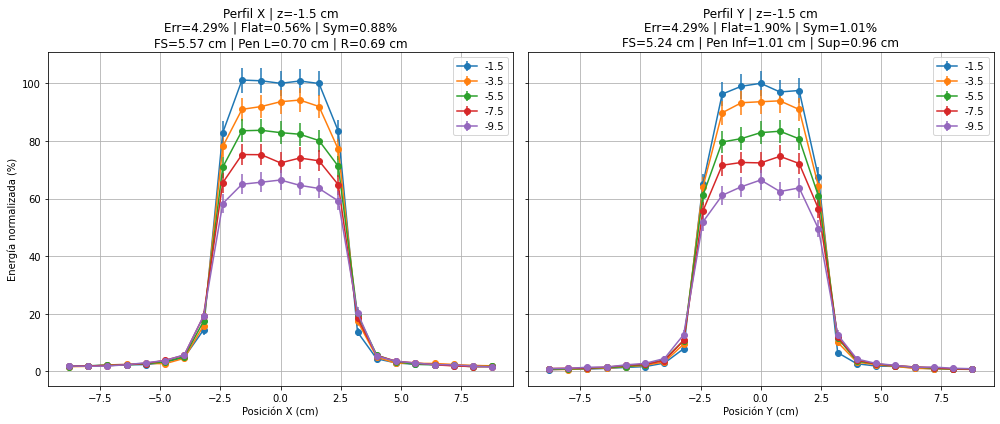

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Funciones auxiliares
# -----------------------------

def calcular_flatness_symmetry(puntos, dx=0.8, field_size=5):
    dosis = np.array(puntos)
    N = len(dosis)

    n_field = int((field_size * 0.8) / dx)
    centro = N // 2
    start = centro - n_field // 2
    end = centro + n_field // 2
    dosis_central = dosis[start:end]

    Dmax = np.max(dosis_central)
    Dmin = np.min(dosis_central)
    flatness = (Dmax - Dmin) / (Dmax + Dmin) * 100

    izquierda = dosis_central[:n_field // 2]
    derecha = dosis_central[-1:-1 - n_field // 2:-1]
    symmetry = np.max(np.abs(izquierda - derecha) / dosis_central[n_field // 2]) * 100

    return flatness, symmetry


def calcular_field_size(x, y, nivel=50):
    y = np.array(y)
    cruces = []
    for i in range(len(y) - 1):
        if (y[i] - nivel) * (y[i + 1] - nivel) <= 0:
            t = (nivel - y[i]) / (y[i + 1] - y[i])
            x_cross = x[i] + t * (x[i + 1] - x[i])
            cruces.append(x_cross)

    if len(cruces) >= 2:
        return cruces[-1] - cruces[0], cruces
    else:
        return None, []


def calcular_penumbra(x, y, niveles=(80, 20)):
    y = np.array(y)
    x = np.array(x)
    cruces = {niv: [] for niv in niveles}

    for nivel in niveles:
        for i in range(len(y) - 1):
            if (y[i] - nivel) * (y[i + 1] - nivel) <= 0:
                t = (nivel - y[i]) / (y[i + 1] - y[i])
                x_cross = x[i] + t * (x[i + 1] - x[i])
                cruces[nivel].append(x_cross)

    if len(cruces[80]) >= 2 and len(cruces[20]) >= 2:
        penumbra_izq = abs(cruces[20][0] - cruces[80][0])
        penumbra_der = abs(cruces[20][-1] - cruces[80][-1])
        return penumbra_izq, penumbra_der
    else:
        return None, None


# -----------------------------
# Cálculos principales
# -----------------------------

prof_pos = [-1.5, -3.5, -5.5, -7.5, -9.5]
df = df_1.copy()
z_superf = prof_pos[0]

central_val = df[(df["z"] == z_superf) & (df["x"] == 0) & (df["y"] == 0)]["Energy_Per_Particle"].values[0]

# Perfil X
pdd_superf_x = df[(df["z"] == z_superf) & (df["y"] == 0.0)].copy()
pdd_superf_x["Energy_Per_Particle"] = 100 * pdd_superf_x["Energy_Per_Particle"] / central_val
central_error_x = 100 * pdd_superf_x[pdd_superf_x["x"] == 0]["m_sigma"].values[0] / central_val

flatness_x, symmetry_x = calcular_flatness_symmetry(pdd_superf_x["Energy_Per_Particle"].values)
field_size_x, _ = calcular_field_size(pdd_superf_x["x"].values, pdd_superf_x["Energy_Per_Particle"].values)
penumbra_x = calcular_penumbra(pdd_superf_x["x"].values, pdd_superf_x["Energy_Per_Particle"].values)

# Perfil Y
pdd_superf_y = df[(df["z"] == z_superf) & (df["x"] == 0.0)].copy()
pdd_superf_y["Energy_Per_Particle"] = 100 * pdd_superf_y["Energy_Per_Particle"] / central_val
central_error_y = 100 * pdd_superf_y[pdd_superf_y["y"] == 0]["m_sigma"].values[0] / central_val

flatness_y, symmetry_y = calcular_flatness_symmetry(pdd_superf_y["Energy_Per_Particle"].values)
field_size_y, _ = calcular_field_size(pdd_superf_y["y"].values, pdd_superf_y["Energy_Per_Particle"].values)
penumbra_y = calcular_penumbra(pdd_superf_y["y"].values, pdd_superf_y["Energy_Per_Particle"].values)

# -----------------------------
# Gráficos en un row
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico X
for z in prof_pos:
    pdd = df[(df["z"] == z) & (df["y"] == 0.0)].copy()
    pdd["Energy_Per_Particle"] = 100 * pdd["Energy_Per_Particle"] / central_val
    axs[0].errorbar(pdd["x"], pdd["Energy_Per_Particle"], 100 * pdd["m_sigma"] / central_val, fmt="-o", label=f"{z}")

axs[0].grid()
axs[0].legend()
axs[0].set_title(
    f"Perfil X | z={z_superf} cm\n"
    f"Err={central_error_x:.2f}% | Flat={flatness_x:.2f}% | Sym={symmetry_x:.2f}%\n"
    f"FS={field_size_x:.2f} cm | Pen L={penumbra_x[0]:.2f} cm | R={penumbra_x[1]:.2f} cm"
)
axs[0].set_ylabel("Energía normalizada (%)")
axs[0].set_xlabel("Posición X (cm)")

# Gráfico Y
for z in prof_pos:
    pdd = df[(df["z"] == z) & (df["x"] == 0.0)].copy()
    pdd["Energy_Per_Particle"] = 100 * pdd["Energy_Per_Particle"] / central_val
    axs[1].errorbar(pdd["y"], pdd["Energy_Per_Particle"], 100 * pdd["m_sigma"] / central_val, fmt="-o", label=f"{z}")

axs[1].grid()
axs[1].legend()
axs[1].set_title(
    f"Perfil Y | z={z_superf} cm\n"
    f"Err={central_error_y:.2f}% | Flat={flatness_y:.2f}% | Sym={symmetry_y:.2f}%\n"
    f"FS={field_size_y:.2f} cm | Pen Inf={penumbra_y[0]:.2f} cm | Sup={penumbra_y[1]:.2f} cm"
)
axs[1].set_xlabel("Posición Y (cm)")

plt.tight_layout()
plt.show()


In [97]:

# # Convertir a DataFrame
# ref_df = pd.read_csv(StringIO(data), sep="\t")
# ref_df["cm"] = ref_df["mm"] / 10  # convertir mm a cm

# # Obtener perfil simulado
# z_ref = -1.5  # profundidad
# sim_df = df_1.copy()
# pdd = sim_df[(sim_df["z"] == z_ref) & (sim_df["y"] == 0.0)].copy()

# # Normalizar a 100 en x=0
# norm = pdd[pdd["x"] == 0]["Energy_Per_Particle"].values[0]
# pdd["%"] = pdd["Energy_Per_Particle"] / norm * 100

# # Interpolar perfil simulado en puntos de la referencia
# interp_sim = np.interp(ref_df["cm"], pdd["x"], pdd["%"])

# # Calcular diferencias
# ref_df["sim_interp"] = interp_sim
# ref_df["diff"] = ref_df["sim_interp"] - ref_df["%"]

# # Graficar diferencia
# plt.figure(figsize=(8, 5))
# plt.plot(ref_df["cm"], ref_df["diff"], label="Diferencia (Simulado - Referencia)")
# plt.axhline(0, color="gray", linestyle="--")
# plt.xlabel("x (cm)")
# plt.ylabel("Diferencia (%)")
# plt.title(f"Diferencia en perfil X a z = {z_ref} cm")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


# # Convertir a DataFrame
# ref_df = pd.read_csv(StringIO(data), sep="\t")
# ref_df["cm"] = ref_df["mm"] / 10  # convertir mm a cm

# # Obtener perfil simulado
# z_ref = 101.5  # profundidad
# sim_df = df_1.copy()
# pdd = sim_df[(sim_df["z"] == z_ref) & (sim_df["x"] == 0.0)].copy()

# # Normalizar a 100 en x=0
# norm = pdd[pdd["y"] == 0]["Energy_Per_Particle"].values[0]
# pdd["%"] = pdd["Energy_Per_Particle"] / norm * 100

# # Interpolar perfil simulado en puntos de la referencia
# interp_sim = np.interp(ref_df["cm"], pdd["y"], pdd["%"])

# # Calcular diferencias
# ref_df["sim_interp"] = interp_sim
# ref_df["diff"] = ref_df["sim_interp"] - ref_df["%"]

# # Graficar diferencia
# plt.figure(figsize=(8, 5))
# plt.plot(ref_df["cm"], ref_df["diff"], label="Diferencia (Simulado - Referencia)")
# plt.axhline(0, color="gray", linestyle="--")
# plt.xlabel("x (cm)")
# plt.ylabel("Diferencia (%)")
# plt.title(f"Diferencia en perfil X a z = {z_ref} cm")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

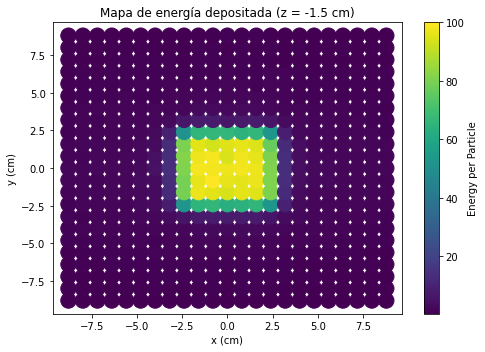

In [98]:
df = df_1.copy()
for z in [-1.5]:
    df_map = df[df["z"] == -1.5]

    plt.figure(figsize=(7, 5))
    sc = plt.scatter(df_map["x"], df_map["y"], c=df_map["Energy_Per_Particle"]/df_map["Energy_Per_Particle"].max()*100, cmap="viridis", s=235)
    plt.colorbar(sc, label="Energy per Particle")
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.title("Mapa de energía depositada (z = -1.5 cm)")
    plt.tight_layout()
    plt.show()


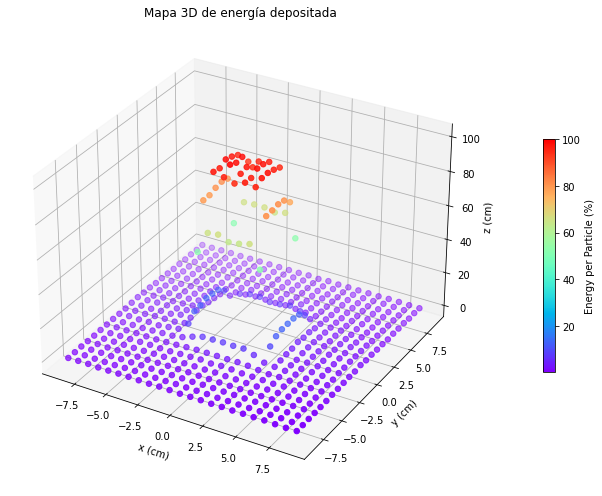

In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para 3D
import numpy as np
# %matplotlib widget
df = df_1.copy()

# Filtro para solo los planos deseados
df = df[df["z"].isin([-1.50])]

# Normalizar los valores de energía (para colores)
norm_energy = df["Energy_Per_Particle"] / df["Energy_Per_Particle"].max() * 100

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df["x"], df["y"], norm_energy,
    c=norm_energy,
    cmap="rainbow",
    s=30
)

cb = plt.colorbar(sc, pad=0.1, shrink=0.5)
cb.set_label("Energy per Particle (%)")

ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_zlabel("z (cm)")
ax.set_title("Mapa 3D de energía depositada")
plt.tight_layout()
plt.show()


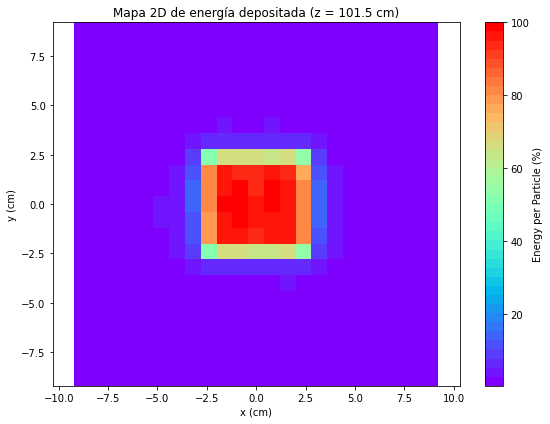

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Obtener una versión cuantizada de un colormap continuo
cmap = plt.get_cmap("rainbow",40)  # Solo 7 niveles de color

# Copiar y filtrar plano z deseado
df = df_1.copy()
df = df[df["z"] == -1.50]

# Normalizar energía
df["norm_energy"] = df["Energy_Per_Particle"] / df["Energy_Per_Particle"].max() * 100

# Crear grilla si los datos están en una malla regular
x_unique = np.sort(df["x"].unique())
y_unique = np.sort(df["y"].unique())
X, Y = np.meshgrid(x_unique, y_unique)

# Crear matriz Z (energía normalizada)
Z = df.pivot(index="y", columns="x", values="norm_energy").values

# Graficar mapa de color 2D
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z, shading='auto', cmap=cmap)
cb = plt.colorbar(c)
cb.set_label("Energy per Particle (%)")

plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.title("Mapa 2D de energía depositada (z = 101.5 cm)")
plt.axis("equal")
plt.tight_layout()
plt.show()
